In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation
import matplotlib.pyplot as plt
import matplotlib.animation as animation

plt.rcParams['animation.ffmpeg_path'] = r'C:\path\to\ffmpeg.exe'  # Adjust this path to where ffmpeg is installed on your system


In [17]:
# List of file names to process
file_names = [
    r"C:\Users\micha\Downloads\abm_milk_choice_upload experimentCampGrid1-table 1(in).csv",
    r"C:\Users\micha\Downloads\abm_milk_choice_upload experimentCampGrid2-table 1(in).csv",
    r"C:\Users\micha\Downloads\abm_milk_choice_upload experimentCampGrid3-table 1(in).csv",
    r"C:\Users\micha\Downloads\abm_milk_choice_upload experimentCampGrid4-table 1(in).csv"
]

# Initialize an empty list to store cleaned dataframes
cleaned_dfs = []

# Process each file
for file in file_names:
    # Read the dataset, skipping the first 6 rows
    df = pd.read_csv(file, skiprows=6, sep=",")  # Ensure correct delimiter (adjust to actual file format)
    
    # Check if the dataset was misread as a single column
    if len(df.columns) == 1:
        # Re-read using a different delimiter if necessary
        df = pd.read_csv(file, skiprows=6, sep="\t")
    
    # Append to the cleaned dataframes list
    cleaned_dfs.append(df)

# Align columns by filling missing columns in each dataset with NaN
all_columns = set().union(*[df.columns for df in cleaned_dfs])
aligned_dfs = [df.reindex(columns=all_columns) for df in cleaned_dfs]

# Concatenate all aligned dataframes into one long dataframe
df_filtered = pd.concat(aligned_dfs, axis=0, ignore_index=True)

print(df_filtered.head())

     mean-soy  count turtles with [color = yellow]  oat-env-mean-initial  \
0  100.000000                                    0                     1   
1  100.000000                                    5                     1   
2  146.254567                                   21                     1   
3  188.393580                                   38                     1   
4  223.059995                                   51                     1   

   social-susceptibility    mean-oat  almond-env-mean-initial  justification  \
0                    1.0  100.000000                        1            0.9   
1                    1.0  100.000000                        1            0.9   
2                    1.0  145.897168                        1            0.9   
3                    1.0  189.527470                        1            0.9   
4                    1.0  221.410888                        1            0.9   

   incumbent-initial-habit  memory-lifetime  soy-health-mean-i

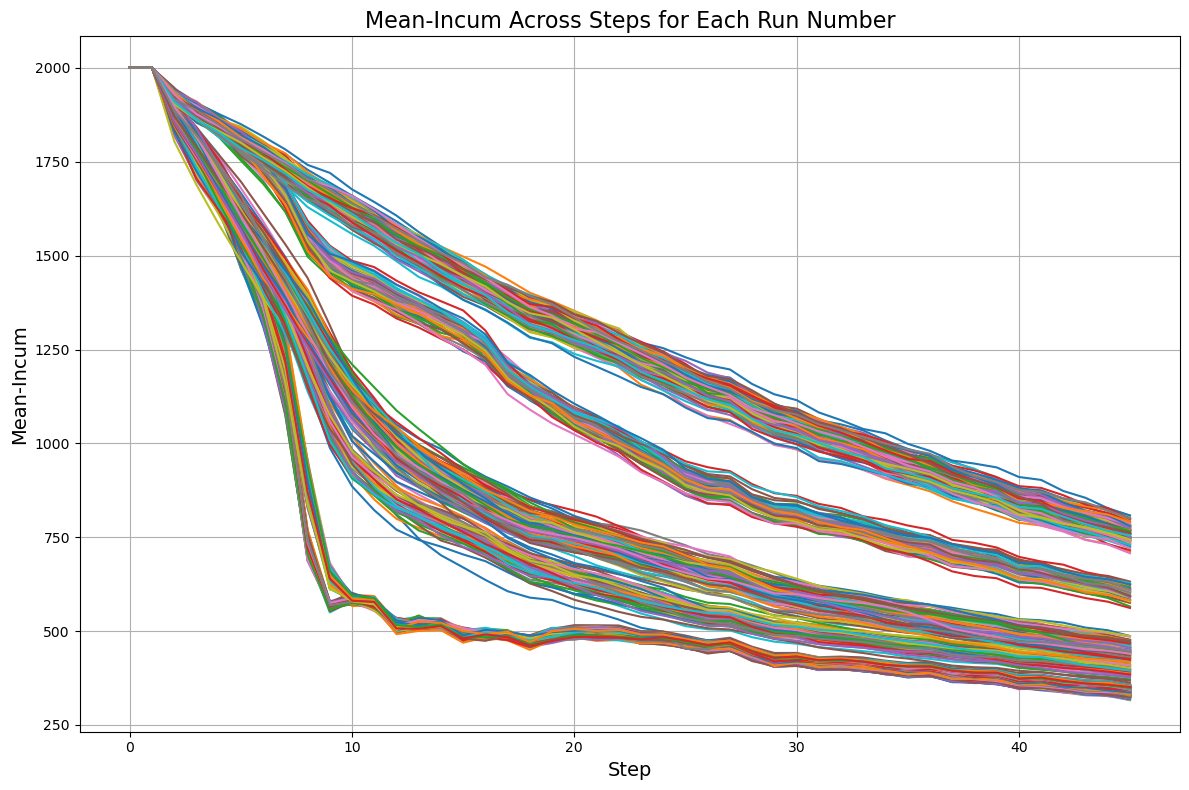

In [22]:
# Step 1: Validate and correct step column
if 'step' not in df_filtered.columns:
    # Ensure steps are calculated within each `[run number]`
    df_filtered['step'] = df_filtered.groupby('[run number]').cumcount()

# Step 2: Ensure steps are in the expected range (0 to 45)
df_filtered = df_filtered[df_filtered['step'] <= 45]  # Filter out invalid steps

# Step 3: Group data by `[run number]`
grouped = df_filtered.groupby('[run number]')

# Step 4: Plot each `[run number]`'s `mean-incum` over steps
plt.figure(figsize=(12, 8))
for run_number, group in grouped:
    plt.plot(group['step'], group['mean-incum'], label=f'Run {run_number}')

# Step 5: Customize plot
plt.title('Mean-Incum Across Steps for Each Run Number', fontsize=16)
plt.xlabel('Step', fontsize=14)
plt.ylabel('Mean-Incum', fontsize=14)
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()


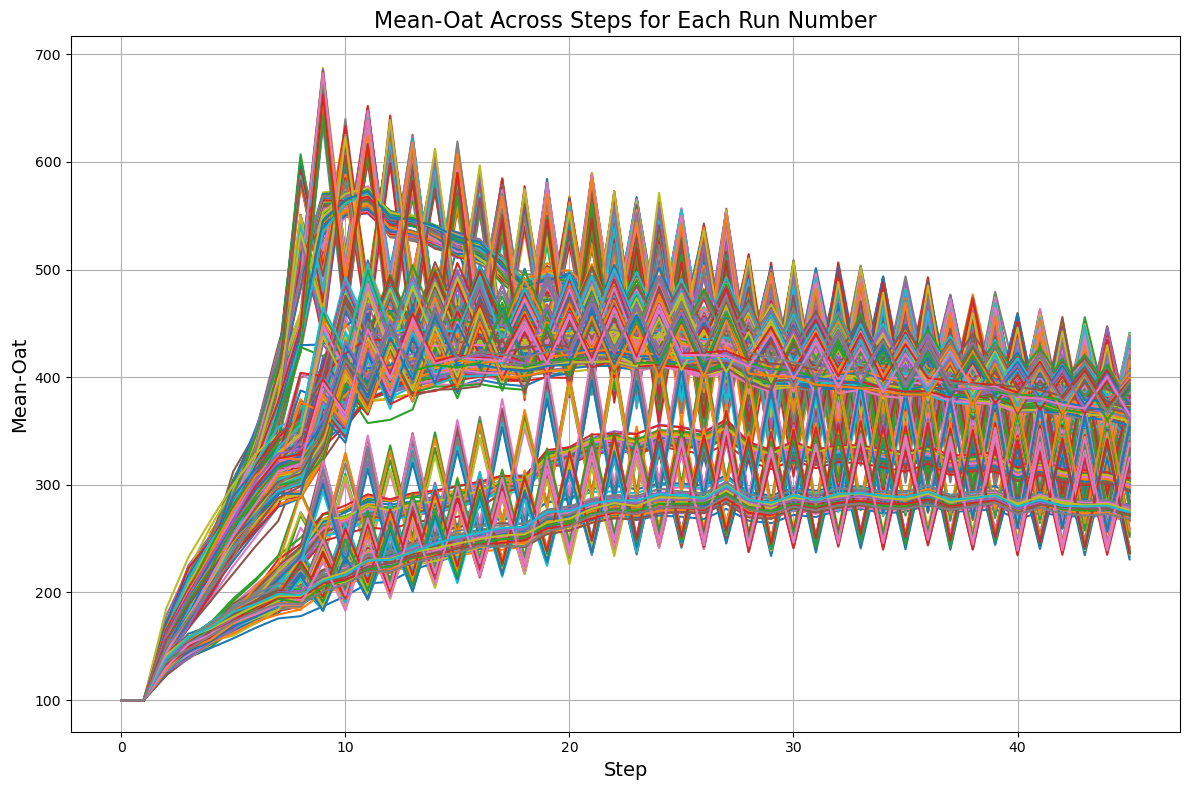

In [23]:
# Step 1: Validate and correct step column
if 'step' not in df_filtered.columns:
    # Ensure steps are calculated within each `[run number]`
    df_filtered['step'] = df_filtered.groupby('[run number]').cumcount()

# Step 2: Ensure steps are in the expected range (0 to 45)
df_filtered = df_filtered[df_filtered['step'] <= 45]  # Filter out invalid steps

# Step 3: Group data by `[run number]`
grouped = df_filtered.groupby('[run number]')

# Step 4: Plot each `[run number]`'s `mean-incum` over steps
plt.figure(figsize=(12, 8))
for run_number, group in grouped:
    plt.plot(group['step'], group['mean-oat'], label=f'Run {run_number}')

# Step 5: Customize plot
plt.title('Mean-Oat Across Steps for Each Run Number', fontsize=16)
plt.xlabel('Step', fontsize=14)
plt.ylabel('Mean-Oat', fontsize=14)
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()

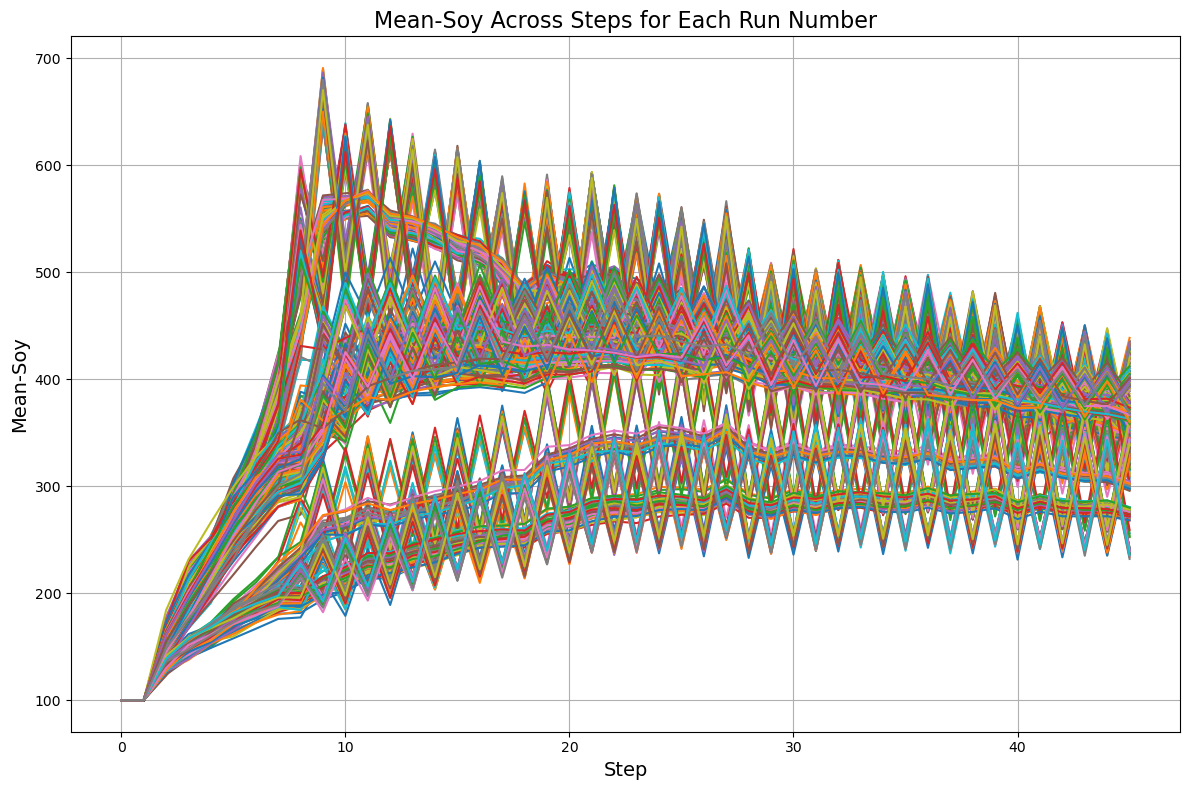

In [24]:
# Step 1: Validate and correct step column
if 'step' not in df_filtered.columns:
    # Ensure steps are calculated within each `[run number]`
    df_filtered['step'] = df_filtered.groupby('[run number]').cumcount()

# Step 2: Ensure steps are in the expected range (0 to 45)
df_filtered = df_filtered[df_filtered['step'] <= 45]  # Filter out invalid steps

# Step 3: Group data by `[run number]`
grouped = df_filtered.groupby('[run number]')

# Step 4: Plot each `[run number]`'s `mean-incum` over steps
plt.figure(figsize=(12, 8))
for run_number, group in grouped:
    plt.plot(group['step'], group['mean-soy'], label=f'Run {run_number}')

# Step 5: Customize plot
plt.title('Mean-Soy Across Steps for Each Run Number', fontsize=16)
plt.xlabel('Step', fontsize=14)
plt.ylabel('Mean-Soy', fontsize=14)
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()

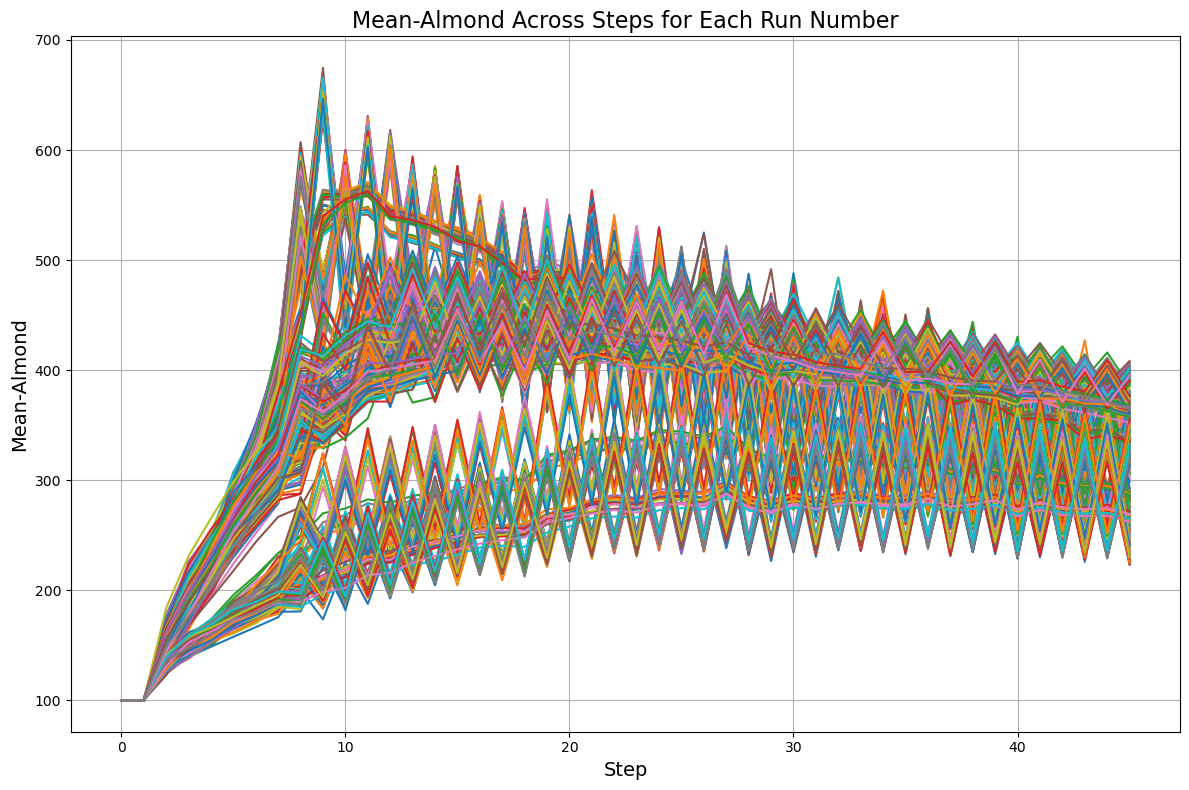

In [25]:
# Step 1: Validate and correct step column
if 'step' not in df_filtered.columns:
    # Ensure steps are calculated within each `[run number]`
    df_filtered['step'] = df_filtered.groupby('[run number]').cumcount()

# Step 2: Ensure steps are in the expected range (0 to 45)
df_filtered = df_filtered[df_filtered['step'] <= 45]  # Filter out invalid steps

# Step 3: Group data by `[run number]`
grouped = df_filtered.groupby('[run number]')

# Step 4: Plot each `[run number]`'s `mean-incum` over steps
plt.figure(figsize=(12, 8))
for run_number, group in grouped:
    plt.plot(group['step'], group['mean-almond'], label=f'Run {run_number}')

# Step 5: Customize plot
plt.title('Mean-Almond Across Steps for Each Run Number', fontsize=16)
plt.xlabel('Step', fontsize=14)
plt.ylabel('Mean-Almond', fontsize=14)
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()